In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Seattle_Pet_License.csv')

In [50]:
print(df.head(5))
print(df.info(5))

  License Issue Date License Number Animal's Name Species       Primary Breed  \
0   December 18 2015        S107948           Zen     Cat   Domestic Longhair   
1       June 14 2016        S116503         Misty     Cat            Siberian   
2     August 04 2016        S119301          Lyra     Cat                 Mix   
3     August 10 2019        S133113        Spider     Cat              LaPerm   
4   November 21 2019        8002549          Maxx     Cat  American Shorthair   

  Secondary Breed  ZIP Code  Issue Year  
0             Mix   98117.0        2015  
1             NaN   98117.0        2016  
2             NaN   98121.0        2016  
3             NaN   98115.0        2019  
4             NaN   98125.0        2019  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43717 entries, 0 to 43716
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   License Issue Date  43717 non-null  object 
 1   L

In [8]:
df = df.dropna(subset=['Primary Breed'])

In [52]:
# Question: What are the most popular dog breeds in Seattle?
popular_breeds = df['Primary Breed'].value_counts().head(10)  # Top 10 dog breeds

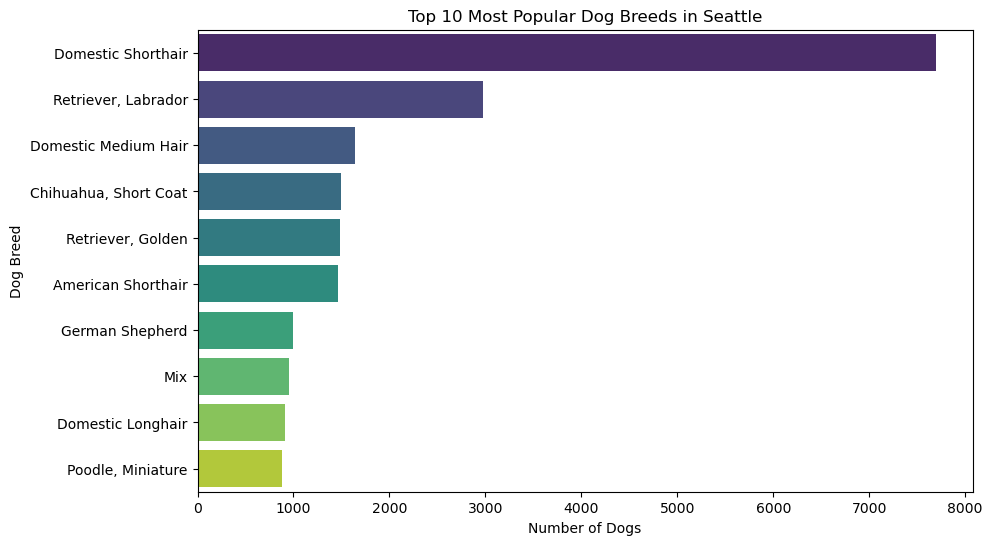

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_breeds.values, y=popular_breeds.index, hue=popular_breeds.index, palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Most Popular Dog Breeds in Seattle')
plt.xlabel('Number of Dogs')
plt.ylabel('Dog Breed')
plt.show()

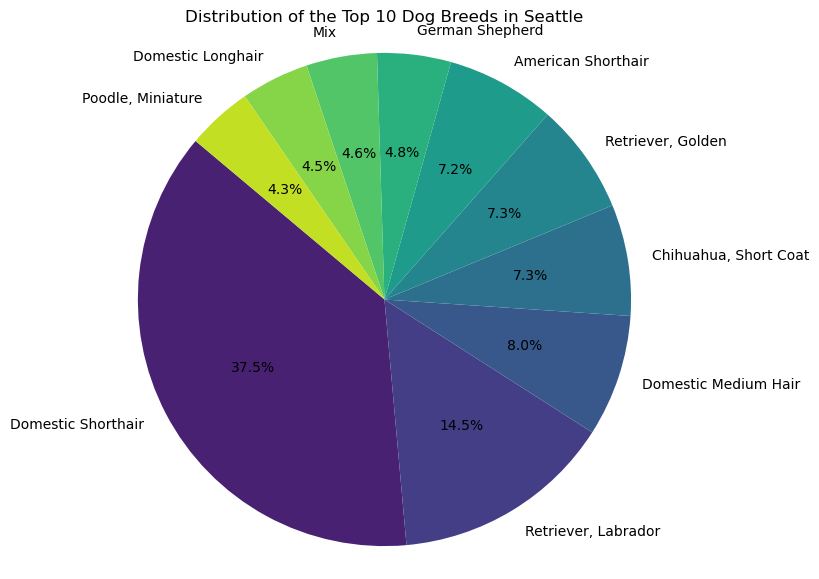

In [76]:
# Visualization 2: Pie chart of the top 10 dog breeds
plt.figure(figsize=(7, 7))
plt.pie(popular_breeds.values, labels=popular_breeds.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 10))
plt.title('Distribution of the Top 10 Dog Breeds in Seattle')
plt.axis('equal')
plt.show()

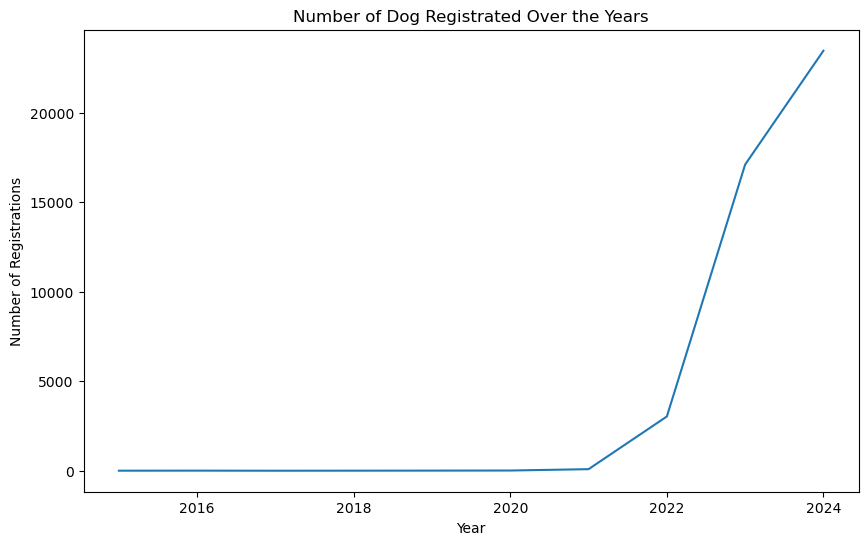

In [70]:
# Assuming there's a 'License Issue Date' column in the dataset
df['Issue Year'] = pd.to_datetime(df['License Issue Date'], errors='coerce').dt.year

# Counting the no of dog's licenses per year
yearly_dogs = df.groupby('Issue Year').size()

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_dogs.index, y=yearly_dogs.values)
plt.title('Number of Dog Registrated Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.show()